### Developing and Comparing Machine Learning Models for Predicting Vaccine Distribution Likelihood

By Brittney Nitta-Lee

### Business and Data Understanding

The National Center for Health Statistics (NCHS) conducted a National 2009 H1N1 Flu Survey which was sponsored by the National Center for Immunization and Respiratory Diseases. The one-time survey was a list-assisted random-digit-dialing telephone survey of households. The survey was designed to monitor influenza immunization coverage in the 2009 to 2010 season. 

### Survey respondents

The target population was persons 6 months or older living in the United States. The data includes surveys from more than 26,000 people. 

### Overview

I aim to develop and compare three distinct machine learning models, namely Logistic Regression, Decision Tree Classifier, and Random Forest Classifier, to predict individuals' likelihood of receiving a vaccine. The project will involve preprocessing the dataset, training and tuning the models, and evaluating their performance using appropriate metrics to identify the most effective approach for vaccine distribution prediction.

### Data

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

### Dataset

Let's load our data. We are presented with two datasets. One is labeled Training_Set_Features and the second dataset is labeled Training_Set_labels.

In [2]:
df_features = pd.read_csv("Data/training_set_features.csv")
df_labels = pd.read_csv("Data/training_set_labels.csv")

In [3]:
df_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
df_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


The df_labels dataset include the respondent_id as well as data for the h1n1 vaccine and seasonal vacccine.

### Exploratory Data Analysis

It's time to explore the dataset. I want to understand the datatypes, check for missing values and check the distribution of the target variables, which is the H1N1 vaccine and seasonal flu vaccine. 

Our dataset labeled df_features has 36 columns and the responded_id is an identifier.

In [5]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


The df_labels dataset contais binary variables. 0 = No 1 = Yes, respondents answered either yes or no for each vaccine. To visualize this, I will create a bar graph.

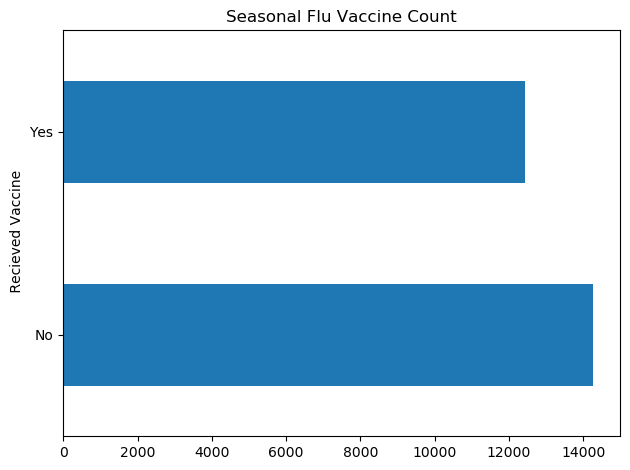

In [6]:
#create bar graph
fig, ax = plt.subplots()
df_labels['seasonal_vaccine'].value_counts().plot.barh(title="Seasonal Flu Vaccine Count")
#add labels and title
ax.set_yticklabels(["No", "Yes"])
ax.set_ylabel(" Recieved Vaccine")
#show plot
fig.tight_layout()

In [7]:
# Count the number of people who got the seasonal flu vaccine
num_seasonal_vaccine = len(df_labels[df_labels['seasonal_vaccine'] == 1])

# Count the number of people who did not get the seasonal flu vaccine
num_seasonal_vaccine_no = len(df_labels[df_labels['seasonal_vaccine'] == 0])

# Print the result of people who got the seasonal flu vaccine
print("Number of people who got the seasonal flu vaccine:", num_seasonal_vaccine)

# Print the result of people who did not get the seasonal flu vaccine
print("Number of people who did not get the seasonal flu vaccine:", num_seasonal_vaccine_no)

Number of people who got the seasonal flu vaccine: 12435
Number of people who did not get the seasonal flu vaccine: 14272


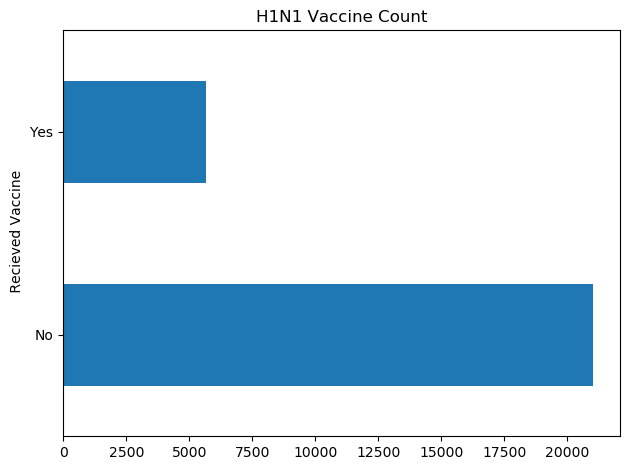

In [8]:
# small bar graph comparing who recieved the vaccine and who didn't
fig, ax = plt.subplots()
df_labels['h1n1_vaccine'].value_counts().plot.barh(title="H1N1 Vaccine Count")
#add labels and title
ax.set_yticklabels(["No", "Yes"])
ax.set_ylabel(" Recieved Vaccine")
#show plot
fig.tight_layout()

In [9]:
# Count the number of people who got the h1n1 flu vaccine
num_h1n1_vaccine = len(df_labels[df_labels['h1n1_vaccine'] == 1])

# Count the number of people who did not get the h1n1 vaccine

num_h1n1_vaccine_no = len(df_labels[df_labels['h1n1_vaccine'] == 0])

# Print the result
print("Number of people who got the h1n1 vaccine:", num_h1n1_vaccine)

# Print the number of people who did not get the h1n1 vaccine
print("Number of people did not get the h1n1 vaccine:", num_h1n1_vaccine_no)

Number of people who got the h1n1 vaccine: 5674
Number of people did not get the h1n1 vaccine: 21033


According to the bar graph, more respondents received the flu vaccine rather than the H1N1 vaccine. This doesn't tell me much so let's look at other features in the dataset.

### Features

In [10]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

For the full description of features <a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/"> you can find it on Drivendata.org </a> 

For all binary variables: 0 = No; 1 = Yes.
1. h1n1_concern - Level of concern about the H1N1 flu 
2. h1n1_knowledge
3. behavioral_antiviral_meds - Has taken antiviral medications. (binary)
4. behavioral_avoidance - Has avoided close contact with others with flu-like symptoms.
(binary)
5. behavioral_face_mask - Has bought a face mask. (binary)
6. behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
7. behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
8. behavioral_outside_home - Has reduced contact with people outside of own household.
(binary)
9. behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary) 
10. doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
11. doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
12. chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
13. child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
14. health_worker - Is a healthcare worker. (binary)
15. health_insurance - Has health insurance. (binary)
16. opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness. 1= Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
17. opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
18. opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
19. opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
20. opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
21. opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
22. age_group - Age group of respondent.
23. education - Self-reported education level.
24. race - Race of respondent.
25. sex - Sex of respondent.
26. income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
27. marital_status - Marital status of respondent.
28. rent_or_own - Housing situation of respondent.
29. employment_status - Employment status of respondent.
30. hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
31. census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
32. household_adults - Number of other adults in household, top-coded to 3.
33. household_children - Number of children in household, top-coded to 3.
34. employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
35. employment_occupation - Type of occupation of respondent. Values are represented as short random character strings

That's a lot of information and it looks like the columns are mixed with flu and h1n1 vaccines. In our exploratory data analysis, we saw that less than half of the respondents recieved the h1n1 vaccine. Due to the low number, I will leave out the data from h1n1 vaccines, entirely and focus on the seasonal flu vaccine data. 

### Exploratory Data Analysis of Seasonal Flu Vaccine 

From our df_features dataset, we are going to drop columns that have h1n1 vaccination data. Since we don't need the data from h1n1 respondents, I will also drop those columns in our df_labels dataset. We will keep the respondent_ID for both datasets.

In [11]:
# Renaming the df_features dataframe to flu_features
flu_features = df_features.drop(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc', 'hhs_geo_region',
'employment_industry', 'employment_occupation'], axis = 1)
flu_features.head() 

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [12]:
# Renaming the df_labels dataframe to df_seasonal_lables
df_seasonal_labels = df_labels.drop(['h1n1_vaccine'], axis = 1) 
df_seasonal_labels.head()

,respondent_id,seasonal_vaccine
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


Since I'm still exploring the data. I will create a new df that joins df_features and df_labels so I can get a better understanding of the datasets. To do this, I have the respondent_id columns from both datasets. First, I will use a simple conditional statement to check to see if the respondent_IDs are the same. 

In [13]:
if set(flu_features['respondent_id']) == set(df_seasonal_labels['respondent_id']):
    print("The respondent IDs are the same in both dataframes.")
else:
    print("The respondent IDs are not the same in both dataframes.")

The respondent IDs are the same in both dataframes.


Great! The respondent_id are the same in both dataframes, so now I can create a joined_df dataframe.

In [14]:
# Join flu_features and df_seasonal_labels on respondent_Id
joined_df = flu_features.merge(df_seasonal_labels, on='respondent_id')
joined_df

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,1
26705,26705,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


### Missing Values

I want to narrow down the features. To do that I will look at joined_df to see which columns have missing values. 

In [15]:
# count the number of missing values in each column
missing_counts = joined_df.isnull().sum()

# print the result
print(missing_counts)

respondent_id                      0
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
census_msa                         0
household_adults                 249
household_children               249
s

So the health insurance column has a lot of data missing, compared to other columns. Due to missing data, I want to see which variables in our training dataset are highly correlated to the seasonal_vaccine column. This will lead me to drop variables that have a low correlation. Variables that have a low correlation could simplify my modles and improve its performance by reducing noise and overfitting.

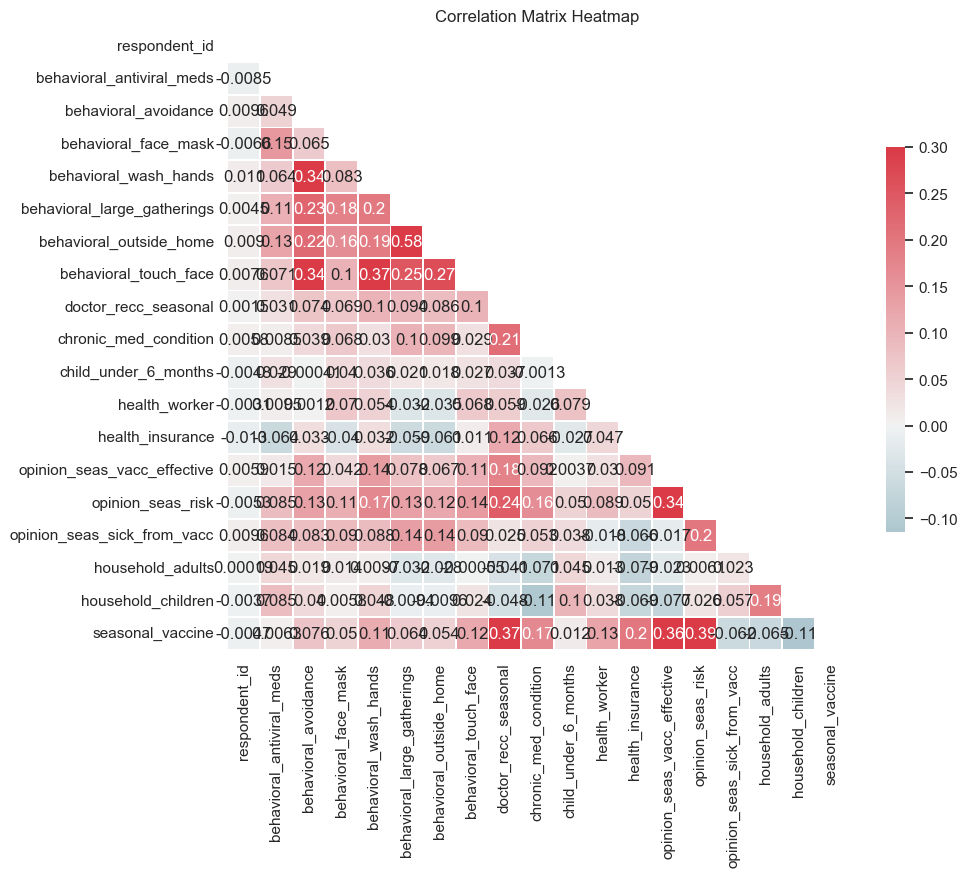

In [16]:
# Perform correlation matrix on training datasets 
correlation_matrix = joined_df.corr()
correlations = correlation_matrix['seasonal_vaccine'][:-1] # correlations of features with target variable

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

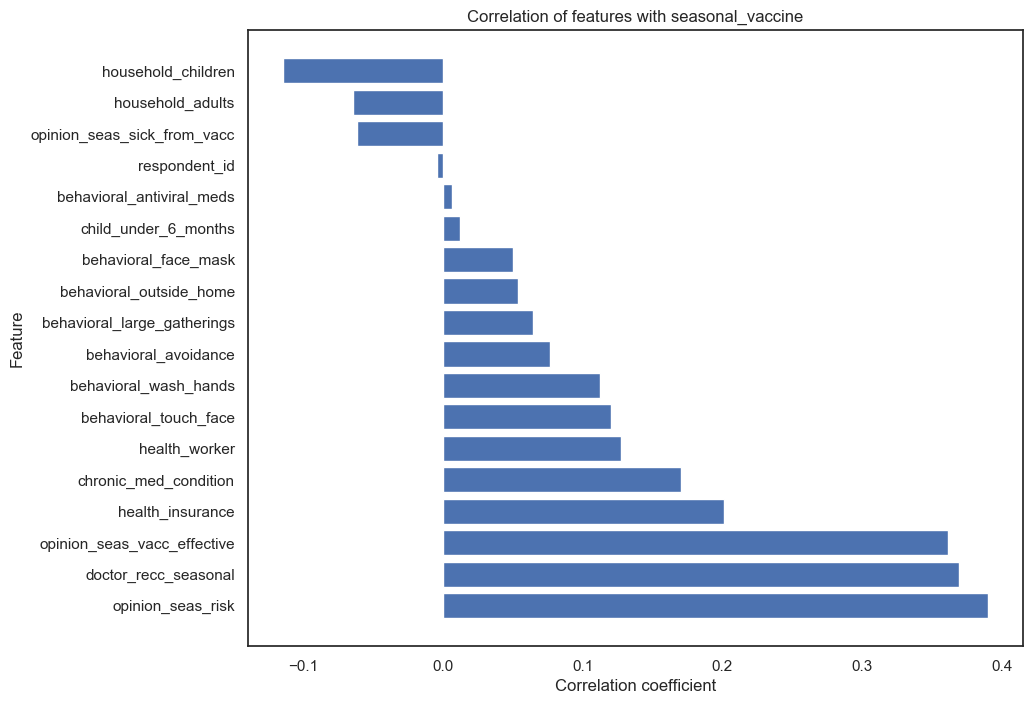

opinion_seas_risk              0.390106
doctor_recc_seasonal           0.369190
opinion_seas_vacc_effective    0.361875
health_insurance               0.200858
chronic_med_condition          0.170174
health_worker                  0.127311
behavioral_touch_face          0.120228
behavioral_wash_hands          0.112414
behavioral_avoidance           0.076395
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_face_mask           0.050083
child_under_6_months           0.012097
behavioral_antiviral_meds      0.006277
respondent_id                 -0.004652
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614
Name: seasonal_vaccine, dtype: float64


In [17]:
# sort correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# plot bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_correlations.index, sorted_correlations.values)
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.title('Correlation of features with seasonal_vaccine')
plt.show()

print(sorted_correlations)

In the training dataset, household_children, opinon_seas_sick_from_vacc and household_adults have negative correlations to the seasonal_vaccine. But I do want to include the number of children and adults in each household, so I will drop opinon_seas_sick_from_vacc column. I will also drop respondent_id, since we won't be using that in our model as well as census_msa, rent_or_own, marital_status and income_poverty.

In [18]:
# Create a list of columns to drop
cols_to_drop = ['census_msa', 'rent_or_own', 'marital_status', 'income_poverty']

# Drop the columns from the X_train and X_test DataFrames
joined_df = joined_df.drop(cols_to_drop, axis=1)

Let's check the shapes of the training and testing datasets, as well as check that the number of rows in the X_train and X_test datasets match.

### Imputation Method

There are NaN values present in the dataset. This means we have missing data in our columns. I could either drop the column or replace them with 0. Let's take a look at our missing values.

In [19]:
# count the number of missing values in each column
missing_counts = joined_df.isnull().sum()

# print the result
print(missing_counts)

respondent_id                      0
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
employment_status               1463
household_adults                 249
household_children               249
seasonal_vaccine                   0
dtype: int64


Health_insurance has the most missing values, the question is why. This data is from the National 2009 H1N1 Flu Survey. In 2009, there was a swine flu pandemic caused by H1N1, swine flu and influenza. The <a href="https://www.cdc.gov/flu/pastseasons/0910season.htm">  CDC reported it more severe for those younger than 65 years of age.</a> Those who did not have health insurance was still able to get the flu shot. So, I will replace the NaN's in the health_insurance column with 0. 

### Simple Imputer

To handle missing values in the health_insurance dataset, I will use a simpleimputer. For all binary columns, I will replace the missing values with 0, since the dataset has alreayd identified binary values as 0 = No and 1 = yes.

In [20]:
cols_to_impute = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
                  'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 
                  'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance','age_group', 
                  'education', 'race', 'sex']

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

joined_df[cols_to_impute] = imputer.fit_transform(joined_df[cols_to_impute])

### Ordinal and Interval Data

There are some columns in our dataset that has a ranking of responses on a scale of 1 to 5. The columns are opinion_seas_sick_from_vacc, opinion_seas_risk, opinion_seas_vacc_effective, education and employment_status. In this case, I will replace the missing values with the most frequent value to preserve the nature of the variable. 

In [21]:
# Define columns to impute
cols_to_impute = ['opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective', 'employment_status']

# Create an instance of SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on joined_df
joined_df[cols_to_impute] = imputer.fit_transform(joined_df[cols_to_impute])


Household_adults and Household_children, have an equal and small number of missing values. To do deal with this, I will use the median to vill the missing values. Since it's a small number, this should not significantly bias the data. 

In [22]:
# create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# fit and transform the imputer to the 'household_adults' and 'household_children' columns in joined_df
joined_df[['household_adults', 'household_children']] = imputer.fit_transform(joined_df[['household_adults', 'household_children']])


Let's take a closer look at the employment_status column. I will need to scale the data to prepare it for my machine learning models. 

In [23]:
joined_df['employment_status'].value_counts()

Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

I will use the OrdinalEncoder to transform the employment_status column in both X_train and X_test datasets. The original encoding will replace the categorical values with integers, starting from 0.

In [24]:
# Create an OrdinalEncoder object
ordinal_encoder = OrdinalEncoder(categories=[['Not in Labor Force', 'Unemployed', 'Employed']])

# Fit and transform the employment_status column in joined_df
joined_df['employment_status'] = ordinal_encoder.fit_transform(joined_df[['employment_status']])

Let's double check to see if all of our missing values are handled. 

In [25]:
# count the number of missing values in each column
missing_counts = joined_df.isnull().sum()

# print the result
print(missing_counts)

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
employment_status              0
household_adults               0
household_children             0
seasonal_vaccine               0
dtype: int64


Great! Now I can move on to one hot encoding our categorical columns.

### One Hot Encoding

I have four categories that need to be encoded into my training dataset. 

In [26]:
# Define columns to one-hot encode
columns_to_encode = ['age_group', 'education', 'race', 'sex']

# One-hot encode the columns in X_train and X_test
joined_df_encoded = pd.get_dummies(joined_df, columns=columns_to_encode)


# Print the shapes of the encoded datasets
print('joined_df:', joined_df_encoded.shape)

joined_df: (26707, 36)


In [27]:
# count the number of missing values in each column
missing_counts = joined_df_encoded.isnull().sum()

# print the result
print(missing_counts)

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
employment_status              0
household_adults               0
household_children             0
seasonal_vaccine               0
age_group_18 - 34 Years        0
age_group_35 - 44 Years        0
age_group_45 - 54 Years        0
age_group_55 - 64 Years        0
age_group_65+ Years            0
education_0                    0
education_12 Years             0
education_< 12 Years           0
education_College Graduate     0
education_Some College         0
race_Black

In [28]:
feature_names = joined_df_encoded.columns
features_list = list(joined_df_encoded.columns)

In [29]:
feature_names.value_counts()

respondent_id                  1
behavioral_antiviral_meds      1
age_group_18 - 34 Years        1
age_group_35 - 44 Years        1
age_group_45 - 54 Years        1
age_group_55 - 64 Years        1
age_group_65+ Years            1
education_0                    1
education_12 Years             1
education_< 12 Years           1
education_College Graduate     1
education_Some College         1
race_Black                     1
race_Hispanic                  1
race_Other or Multiple         1
race_White                     1
sex_Female                     1
seasonal_vaccine               1
household_children             1
household_adults               1
doctor_recc_seasonal           1
behavioral_avoidance           1
behavioral_face_mask           1
behavioral_wash_hands          1
behavioral_large_gatherings    1
behavioral_outside_home        1
behavioral_touch_face          1
chronic_med_condition          1
employment_status              1
child_under_6_months           1
health_wor

In [30]:
features_list.remove('respondent_id')

After I did the one hot encoding, it looks like it presented missing values. I'll use the fillna method to fill the missing values with 0, since they are now binary columns. 

### MinMax Scaler

Great, there's no missing values. Next I will use MinMax Scaler for feature scaling. The data is not normally distributed and the range of variables varies, so the data needs to be scaled to a fixed range. I will fit the transformer on the train data. 

In [31]:
# Create an instance of the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
joined_scaled = scaler.fit_transform(joined_df_encoded)

In [32]:
print(joined_scaled)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.74447690e-05 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.48895379e-05 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [9.99925110e-01 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.99962555e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]]


### Train-Test Split

Now that we have a new dataframe I will perform a train-test split. We will do this before any log transformations on the data due to data leakage and overfitting.  I will use the training set to train a machine learning model, and then use the test set to evaluate the model's performance on unseen data. 

In [33]:
# Define features and target
X = joined_df_encoded[['respondent_id', 'health_insurance','employment_status', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
               'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 
               'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults', 'household_children',
               'age_group_18 - 34 Years','age_group_35 - 44 Years', 'age_group_45 - 54 Years', 'age_group_55 - 64 Years','age_group_65+ Years','education_0', 'education_12 Years','education_< 12 Years','education_College Graduate',
            'education_Some College','race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Female', 'sex_Male']]
y = joined_df_encoded['seasonal_vaccine']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
display(X_train.head())
display(X_test.head())

,respondent_id,health_insurance,employment_status,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male
5303,5303,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,1
2703,2703,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,1
6586,6586,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,1,1,0
22563,22563,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,1
2338,2338,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,1


,respondent_id,health_insurance,employment_status,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male
15772,15772,0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
9407,9407,0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
16515,16515,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
23353,23353,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0
10008,10008,0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1


Great! I want to check the shapes of the training and testing datasets, as well as check that the number of rows in the X and y datasets match. 

In [35]:
print(X_train.shape)
print(X_test.shape)
# Check to see number of rows in X_train matches rows in target dataset 
print(X_train.shape[0] == y_train.shape[0])
# Check to see number of rows in testing feature dataset matches number of rows in testing target dataset
print(X_test.shape[0] == y_test.shape[0])

(18694, 35)
(8013, 35)
True
True


### Baseline Model

Let's create a dummy classifier to predict the most frequent class in the training data. Since this is a classifcation problem, a dummy classifier will help establish a baseline performance.

In [36]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier on the training data
dummy_clf.fit(X_train, y_train)

# Evaluate the dummy classifier on the test data
dummy_clf.score(X_test, y_test)

# Make predictions on the training data
y_train_pred = dummy_clf.predict(X_train)

# Generate the training report matrix
print("Training Report Matrix")
print(classification_report(y_train, y_train_pred))

# Make predictions on the test data
y_test_pred = dummy_clf.predict(X_test)

# Generate the test report matrix
print("Test Report Matrix")
print(classification_report(y_test, y_test_pred))


Training Report Matrix
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      9930
           1       0.00      0.00      0.00      8764

    accuracy                           0.53     18694
   macro avg       0.27      0.50      0.35     18694
weighted avg       0.28      0.53      0.37     18694

Test Report Matrix
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      4342
           1       0.00      0.00      0.00      3671

    accuracy                           0.54      8013
   macro avg       0.27      0.50      0.35      8013
weighted avg       0.29      0.54      0.38      8013



The accuracy scores of the model on the training data is 53% and the test data is 54%. The F1-score for class 0 is 0.69 and 0.70 on the training data and the test data, respectively, while the F1-score for class 1 is 0.00 on both the training data and the test data. 
<br>For this project, I will prioritize accuracy when evaluating the performance of my models. The goal is to predict the most frequent class (0) in a way that provides useful predictions. A model with an accuracy score of 70-80% is considered good in this context, so I will aim for models that achieve an accuracy score of at least 75%.

### Logistic Regression Model

This is a binary classification problem, therefore, I will create a logistic regression model to fit into my preprocessed training dataset. I want to predict whether someone got a flu shot or not, which is a problem where there are only two possible outcomes.

In [37]:
# Sckikit-learn LogisticRegression model 
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Performance on Training Data

Now that I have a model, let's see how it performs on the training data. We will calculate the residuals on the training data to evaluate the performance of a logistic regression model.

In [38]:
y_hat_train = logreg.predict(X_train)
# Difference between predicted and actual labels 
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    14362
1     4332
Name: Residuals (counts), dtype: int64

0    0.768268
1    0.231732
Name: Residuals (proportions), dtype: float64


In this code, 0 means the prediction and the actual value matched, 1 means the prediction and the actual value did not match. So, this is saying 77.39% has a value of 0, which means that the predicted lables match the actual label. The remaining 22.61% of the residuals did not match the actual label. 

### Performance on Test Data

In [39]:
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    6238
1    1775
Name: Residuals (counts), dtype: int64

0    0.778485
1    0.221515
Name: Residuals (proportions), dtype: float64


In this case, 54.49% of the residuals have a value of 0, which means that the predicted label matched the actual label, while 45.51% of the residuals have a value of 1, which means that the predicted label did not match the actual label. The residuals with a value of 1 is lower which means the model is making fewer incorrect predictions. 

### Grid Search

I want to improve the accuracy of the baseline models. I will do a grid search to find the best combination of hyperparameters for the logistic regression model. But, before I do that, I will refactor my code to build a pipeline so I can perform a Grid Search in a way that avoids data leakage. 

In [40]:
# create a pipeline
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression())
])

# define the parameter grid to search over
param_grid = {
    'classifier__solver': ['liblinear'], 
    'classifier__penalty': ['l1', 'l2'], 
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# create the grid search object
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# evaluate the best model on the test data
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)

In [41]:
print(accuracy)

0.7819792836640459


In [42]:
grid_search.best_params_

{'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

So the best combination is C=01, penality = 11 or Lasso regularization, and solver=liblinear which is good for small dataset. 

In [43]:
# Create a new logistic regression model using the hyperparameters obtained from the grid search
logreg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

In [44]:
logreg_new = logreg_model
# Fit the new logistic regression model on the scaled training data
logreg_new.fit(X_train, y_train)

# Predict the labels for the training and test data
y_train_pred = logreg_new.predict(X_train)
y_test_pred = logreg_new.predict(X_test)

# Calculate the accuracy of the new model on the training and test data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on training data:", accuracy_train)
print("Accuracy on test data:", accuracy_test)

# Generate the classification report for the training and test data
target_names = ['class 0', 'class 1']
print("Training classification report:")
print(classification_report(y_train, y_train_pred, target_names=target_names))
print("Test classification report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))


Accuracy on training data: 0.7731892585856425
Accuracy on test data: 0.7813552976413328
Training classification report:
              precision    recall  f1-score   support

     class 0       0.78      0.80      0.79      9930
     class 1       0.77      0.74      0.75      8764

    accuracy                           0.77     18694
   macro avg       0.77      0.77      0.77     18694
weighted avg       0.77      0.77      0.77     18694

Test classification report:
              precision    recall  f1-score   support

     class 0       0.79      0.82      0.80      4342
     class 1       0.77      0.74      0.76      3671

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



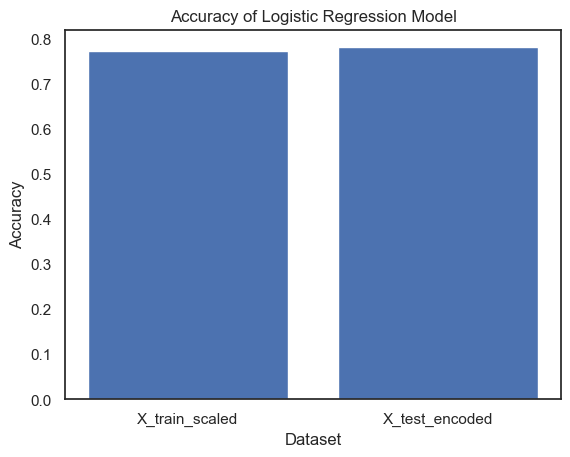

In [45]:
# Define the data
accuracy_scores = [accuracy_train, accuracy_test]
labels = ['X_train_scaled', 'X_test_encoded']

# Create the bar chart
plt.bar(labels, accuracy_scores)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression Model')

# Show the plot
plt.show()

The overall accuracy on the test data is low (0.55), which means the model is not performing well on new, unseen data. The low test accuracy and the difference between training and test accuracy suggest that the model is overfitting the training data.

### Decision Tree Classifier

In [46]:
# Define the pipeline steps
pipeline_steps = [
    ('decision_tree', DecisionTreeClassifier())
]

# Create the pipeline
decision_tree_pipeline = Pipeline(pipeline_steps)


In [47]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('decision_tree', DecisionTreeClassifier())])

In [48]:
# Make predictions using the preprocessed test data
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluate the pipeline using various metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[3043 1299]
 [1230 2441]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      4342
           1       0.65      0.66      0.66      3671

    accuracy                           0.68      8013
   macro avg       0.68      0.68      0.68      8013
weighted avg       0.68      0.68      0.68      8013


Accuracy Score:
0.6843878697117185


In [49]:
decision_tree_pipeline.get_params()

{'memory': None,
 'steps': [('decision_tree', DecisionTreeClassifier())],
 'verbose': False,
 'decision_tree': DecisionTreeClassifier(),
 'decision_tree__ccp_alpha': 0.0,
 'decision_tree__class_weight': None,
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': None,
 'decision_tree__max_features': None,
 'decision_tree__max_leaf_nodes': None,
 'decision_tree__min_impurity_decrease': 0.0,
 'decision_tree__min_samples_leaf': 1,
 'decision_tree__min_samples_split': 2,
 'decision_tree__min_weight_fraction_leaf': 0.0,
 'decision_tree__random_state': None,
 'decision_tree__splitter': 'best'}

In [50]:
#Define the hyperparameter grid for the Decision Tree Classifier within the pipeline
param_grid = {
    'decision_tree__max_depth': [None, 5, 10, 15, 20],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4],
    'decision_tree__max_features': [None, 'sqrt', 'log2']
}

In [51]:
#Create the Grid Search Cross-Validation instance with the pipeline:
grid_search = GridSearchCV(estimator=decision_tree_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [52]:
#Fit the Grid Search to the preprocessed training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decision_tree__max_depth': [None, 5, 10, 15, 20],
                         'decision_tree__max_features': [None, 'sqrt', 'log2'],
                         'decision_tree__min_samples_leaf': [1, 2, 4],
                         'decision_tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [53]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

Best Hyperparameters:
{'decision_tree__max_depth': 5, 'decision_tree__max_features': None, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 5}


In [54]:
clf_decision_tree = DecisionTreeClassifier(max_depth=5,
                                           max_features=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           random_state=42)
clf_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [55]:
test_pred_decision_tree = decision_tree_pipeline.predict(X_test)

In [56]:
print(confusion_matrix)

<function confusion_matrix at 0x7fbf335b6d40>


In [57]:
from sklearn.tree import export_text
tree_rules = export_text(clf_decision_tree,
                        feature_names = features_list)
print(tree_rules)

|--- opinion_seas_sick_from_vacc <= 4.50
|   |--- health_worker <= 0.50
|   |   |--- employment_status <= 2.50
|   |   |   |--- age_group_65+ Years <= 0.50
|   |   |   |   |--- employment_status <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- employment_status >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- age_group_65+ Years >  0.50
|   |   |   |   |--- employment_status <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- employment_status >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- employment_status >  2.50
|   |   |   |--- age_group_18 - 34 Years <= 0.50
|   |   |   |   |--- opinion_seas_risk <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- opinion_seas_risk >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age_group_18 - 34 Years >  0.50
|   |   |   |   |--- opinion_seas_risk <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- opinion_seas_risk >  0.50
|   |   |   |   |   |--- class: 0
|   |--- healt

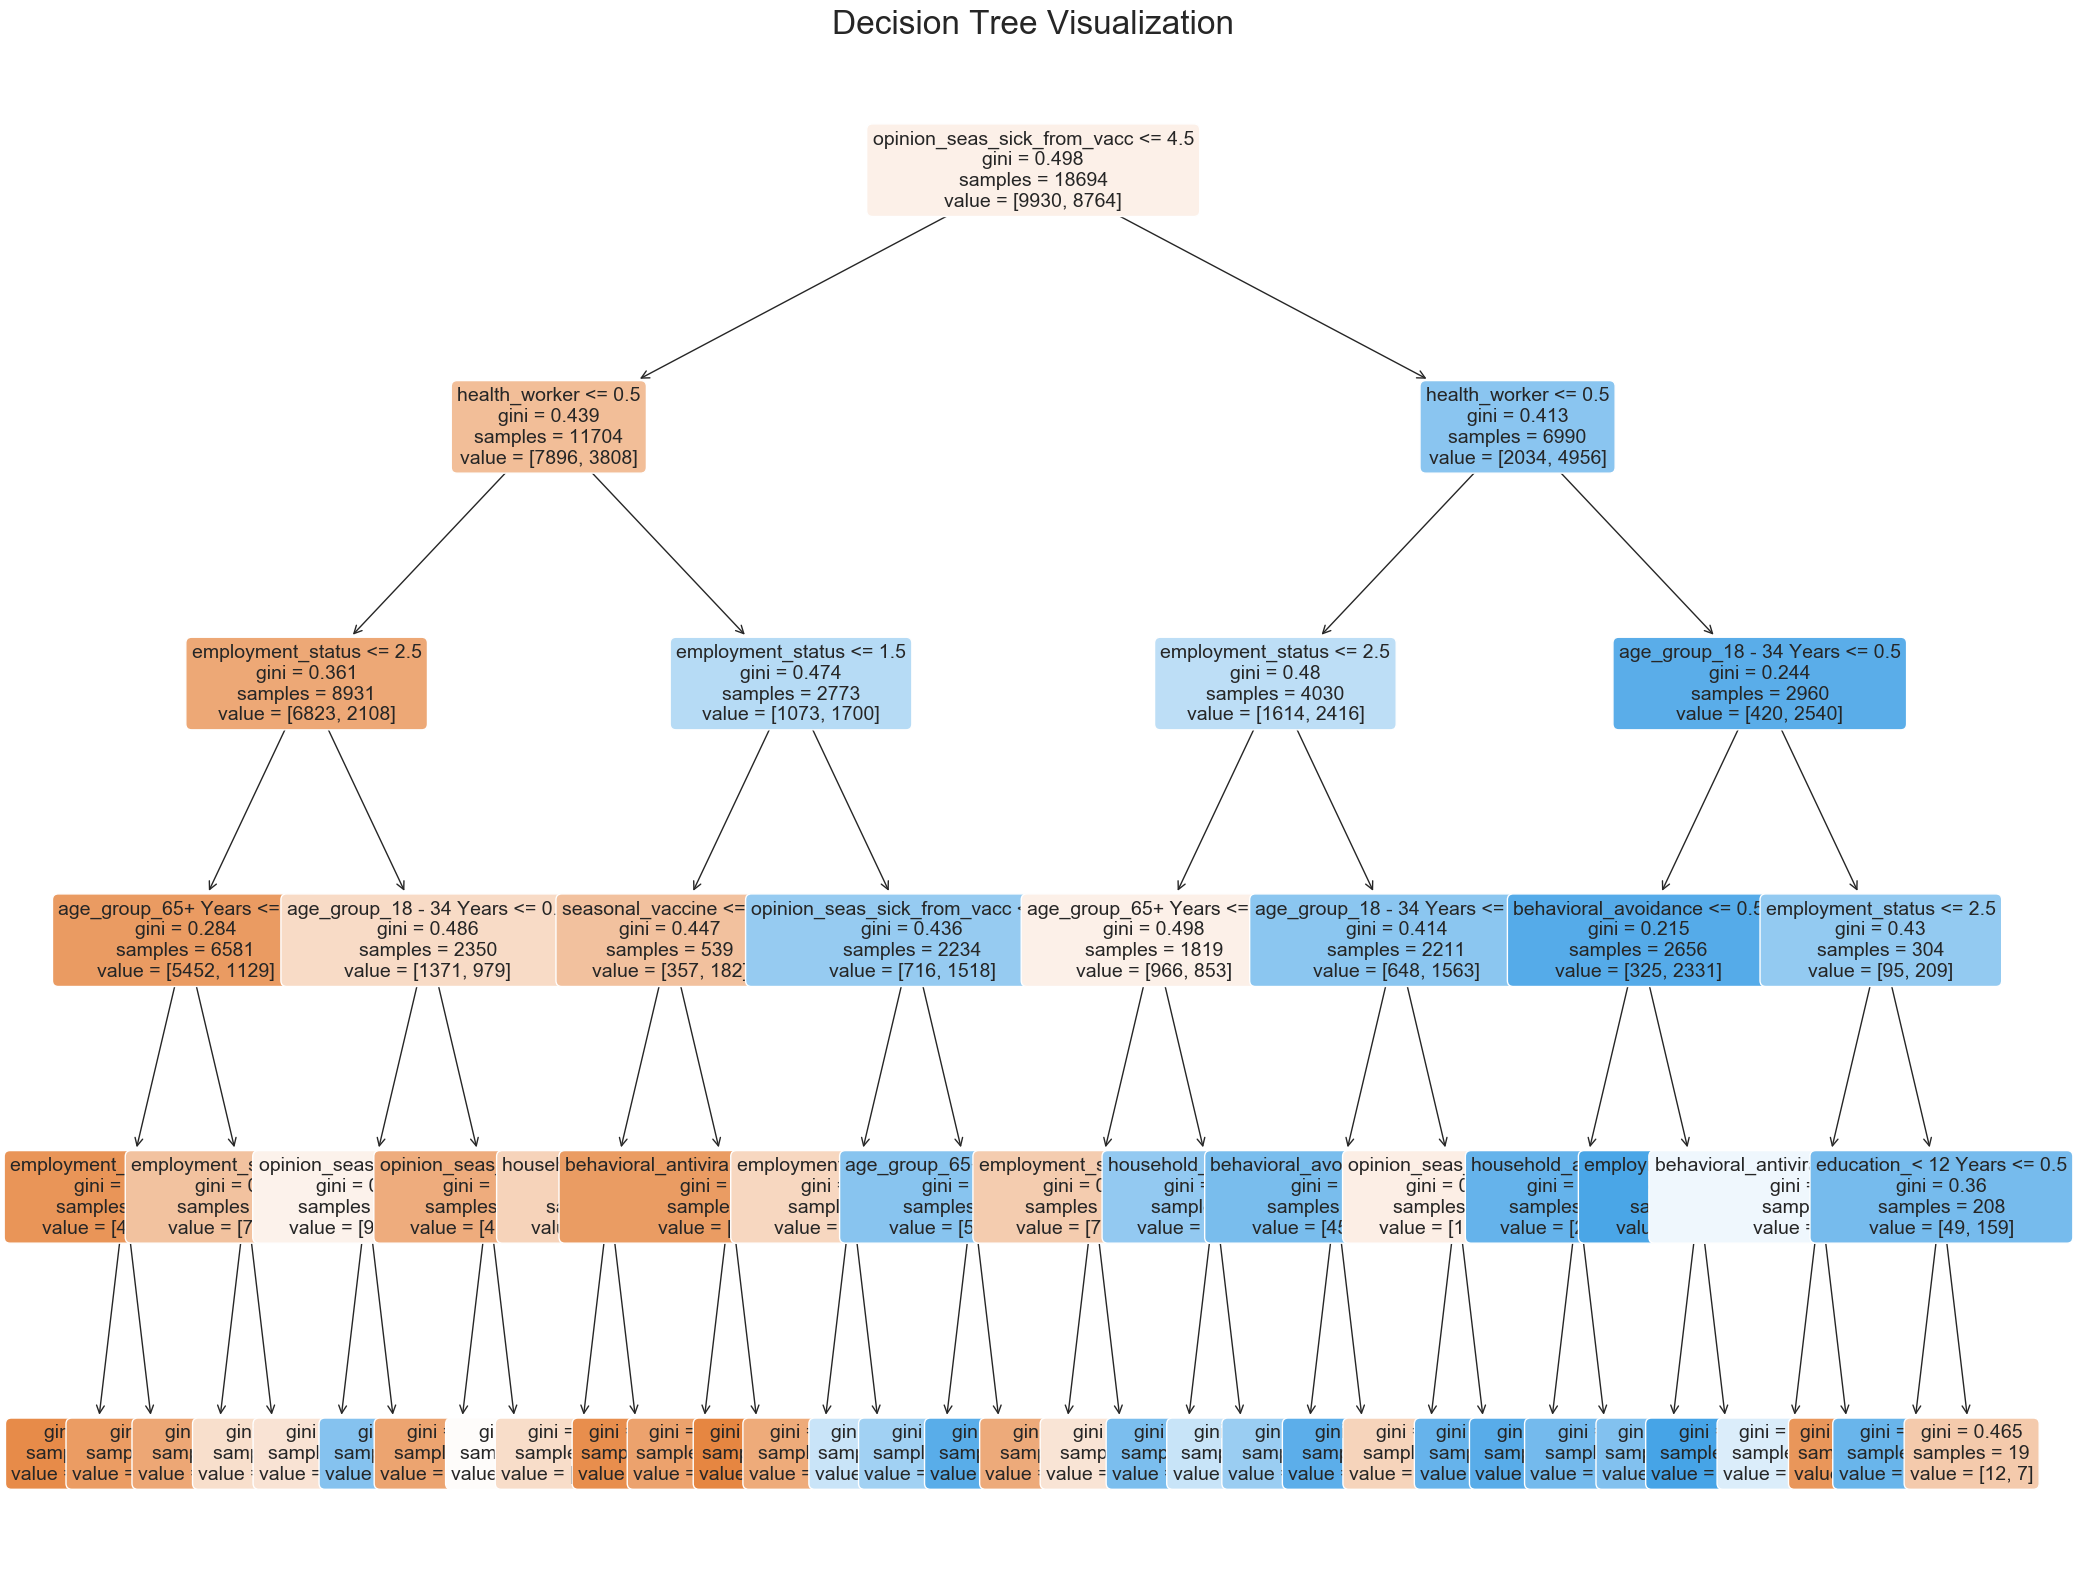

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(25,20))
plot_tree(clf_decision_tree, 
          feature_names=features_list, 
          filled=True, 
          rounded=True, 
          fontsize=14)

# Add title and axis labels
plt.title("Decision Tree Visualization", fontsize=24)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Depth", fontsize=20)

# Show plot
plt.show()

The decision tree splits into two main parts based on one variable, "opinion_seas_vacc_effective". If the value of this variable is less than or equal to 0.88, you follow the left branch, and if it's greater than 0.88, you follow the right branch. Each level of the tree has new rules that help make decisions more precise.

A Gini index of 0.361 means that the samples in the node belong to multiple classes and not all classes are equally represented. This means that there are different reasons why someone would or wouldn't get the flu vaccine.

In [59]:
test_pred_decision_tree = clf_decision_tree.predict(X_test)

In [60]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, 
                                            test_pred_decision_tree)

In [61]:
print(confusion_matrix)

[[3581  761]
 [1184 2487]]


In [62]:
metrics.accuracy_score(y_test, test_pred_decision_tree)

0.7572694371646075

In [63]:
precision = metrics.precision_score(y_test, test_pred_decision_tree, 
                                  average=None)
precision_results = pd.DataFrame(precision, index=labels)

#renaming results column
precision_results.rename(columns={0:'Precision'}, inplace =True)

precision_results

,Precision
X_train_scaled,0.751522
X_test_encoded,0.765702


In [64]:
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79      4342
           1       0.77      0.68      0.72      3671

    accuracy                           0.76      8013
   macro avg       0.76      0.75      0.75      8013
weighted avg       0.76      0.76      0.76      8013



This is pretty good! The Decision Tree Classifier model shows that it's better at predicting class 0 (not recieving the vaccine) with higher recall and higher f1-score, compared to class 1 (those who recieved the vaccine). 

Based on these metrics, the model has an overall accuracy of 0.76 on the test data, which means that it correctly predicted the class for 76% of the instances.

### Random Forest Model

The Decision Tree model did well, but I want to improve the accuracy, so I will build a Random Forest Model. The model combines multiple decision trees to make more accurate predictions by averaging the results of those trees. Which could lead to better accuracy compared to the Decision Treee model. 

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [66]:
# Define the pipeline
rfc_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = pipe.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Baseline accuracy:", accuracy)


Baseline accuracy: 0.7823536752776737


In [67]:
# Define the pipeline
rfc_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Train the model on the training data
rfc_pipe.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rfc_pipe.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print training data matrix report
print("Training Data Matrix Report:")
print(classification_report(y_train, y_train_pred))

# Print test data matrix report
print("Test Data Matrix Report:")
print(classification_report(y_test, y_pred))
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Data Matrix Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      9930
           1       0.77      0.74      0.75      8764

    accuracy                           0.77     18694
   macro avg       0.77      0.77      0.77     18694
weighted avg       0.77      0.77      0.77     18694

Test Data Matrix Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4342
           1       0.76      0.74      0.75      3671

    accuracy                           0.77      8013
   macro avg       0.77      0.77      0.77      8013
weighted avg       0.77      0.77      0.77      8013

Training Accuracy: 0.7731892585856425
Test Accuracy: 0.7726194933233496


The training accuracy is 77% while the test accuracy is 60%. The model is likely overfitting the training data. I want to try another GridSearchCV to improve the accuracy and fix the overfitting.

### Grid Search

In [68]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [69]:
rfc_pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('clf', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'clf': RandomForestClassifier(random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'auto',
 'clf__max_leaf_nodes': None,
 'clf__max_samples': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_jobs': None,
 'clf__oob_score': False,
 'clf__random_state': 42,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [70]:
# Define the parameter grid for grid search
param_grid = {
    'clf__n_estimators': [10, 50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}
# Create instance 
rf = RandomForestClassifier(random_state=42)
# Create a GridSearchCV object
grid_search = GridSearchCV(rfc_pipe, param_grid, cv=5)

In [71]:
# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Now you can access the best_params_ attribute without any errors
print(grid_search.best_params_)

{'clf__max_depth': 20, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}


In [72]:
# Create the pipeline with optimized parameters
rfc_pipe_2 = Pipeline([
    ('clf', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=4, min_samples_split=10))
])

In [73]:
# Fit the pipeline to the training data
rfc_pipe_2.fit(X_train, y_train)

# Get the predicted target labels for the training data
y_train_pred = rfc_pipe_2.predict(X_train)

# Generate the classification report for training data
report_train = classification_report(y_train, y_train_pred, output_dict=True)

# Get the predicted target labels for the testing data
y_test_pred = rfc_pipe_2.predict(X_test)

# Generate the classification report for testing data
report_test = classification_report(y_test, y_test_pred, output_dict=True)

# Print the classification reports for both training and testing data
print("Training Data Matrix Report:\n")
print(classification_report(y_train, y_train_pred))
print("Testing Data Matrix Report:\n")
print(classification_report(y_test, y_test_pred))


Training Data Matrix Report:

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      9930
           1       0.85      0.82      0.84      8764

    accuracy                           0.85     18694
   macro avg       0.85      0.85      0.85     18694
weighted avg       0.85      0.85      0.85     18694

Testing Data Matrix Report:

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4342
           1       0.77      0.74      0.76      3671

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



This report shows the performance of the Random Forest model on the test data (unseen data). The precision, recall, and F1-score are presented for both classes (0 and 1). In this case, the model has a high precision for class 0 (0.84) but a low recall (0.21), meaning it's good at identifying true class 0 instances when it predicts them but misses a lot of actual class 0 instances. For class 1, the model has a high recall (0.95) but a lower precision (0.51), meaning it identifies most of the actual class 1 instances but also predicts many false positives (incorrectly labeling instances as class 1 when they are actually class 0).

The overall accuracy on the test data is 78%, which is lower than the training data accuracy. This suggests that the model is not generalizing well to unseen data and might be overfitting the training data.

### Evaluation

The final model that gave us the highest accuracy on the test dataset is the Decision Tree Classifier. The goal of this project was to predict an individuals' likelihood of recieving a vaccine. The model allows us to predict who doesn't get the vaccine based on features in the dataset. 

In [76]:
importance = pd.DataFrame({'feature': features_list, 'importance' : np.round(clf_decision_tree.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                        feature  importance
14  opinion_seas_sick_from_vacc       0.425
10                health_worker       0.265
15            employment_status       0.167
23          age_group_65+ Years       0.061
19      age_group_18 - 34 Years       0.036
13            opinion_seas_risk       0.019
1          behavioral_avoidance       0.013
16             household_adults       0.006
18             seasonal_vaccine       0.003
26         education_< 12 Years       0.002
0     behavioral_antiviral_meds       0.001
33                   sex_Female       0.000
32                   race_White       0.000
31       race_Other or Multiple       0.000
30                race_Hispanic       0.000
25           education_12 Years       0.000
22      age_group_55 - 64 Years       0.000
27   education_College Graduate       0.000
28       education_Some College       0.000
29                   race_Black       0.000
24                  education_0       0.000
17           household_children 

The importance of each feature is listed as a value between 0 and 1, with higher values indicating that the feature is more important in predicting the target variable. In this case, the target variable is likely whether or not a person gets the flu vaccine (class 0 means no vaccine, class 1 means yes vaccine). The most important feature in this model is "opinion_seas_vacc_effective", with an importance value of 0.425, followed by "doctor_recc_seasonal" with an importance of 0.265, and "opinion_seas_risk" with an importance of 0.167. The other features have much lower importance values, indicating that they are less relevant for predicting whether or not an individual gets the seasonal flu vaccine.

### Reccomendations

Based on the feature importance results, the top three most important features for predicting whether someone gets the seasonal flu vaccine are:

1. opinion_seas_vacc_effective
2. doctor_recc_seasonal
3. opinion_seas_risk

Therefore, one recommendation would be to focus on improving people's perception of the effectiveness of the vaccine and increasing recommendations from doctors. This could involve public health campaigns and education initiatives to better inform people about the benefits of getting vaccinated and addressing common misconceptions or concerns.

Additionally, the model suggests that age and health worker status are also important factors to consider. Therefore, targeted outreach to older adults and healthcare professionals may also be effective in increasing vaccination rates.

Finally, it's worth noting that some of the other features had very low importance in the model, such as employment status and behavioral habits. While these factors may still be important for individual decision-making, they may not have as much impact on whether someone actually gets vaccinated. Therefore, resources and efforts may be better spent on targeting the factors with higher importance.

### Limitations

Data collection was conducted through telephone surveys and could include, limited access to certain populations, non-reponse bias, inaccurate responses and exclusion of non-English speakers. Collecting data through only telephone surveys can limit the sample size and other methods of data collection may need to be considered to minimize these limitations. 

### Next Steps

Despite being collected via telephone surveys, the respondents provided valuable information. To increase flu vaccination rates, the CDC could consider collecting data through additional methods such as online surveys, in-person door-to-door surveys, and by ensuring that surveys are available in multiple languages.